In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("Churn.csv")


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# CHURN DISTRIBUTION

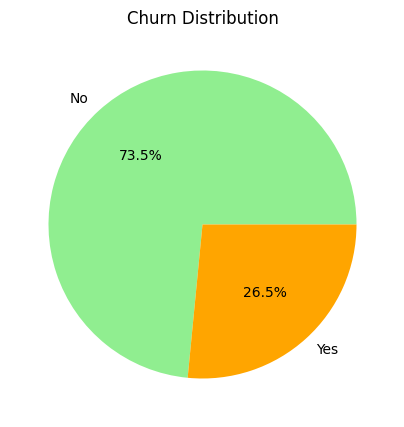

In [8]:
df['Churn'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['lightgreen','orange'], figsize=(5,5))
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()


# **CHURN BY GENDER**

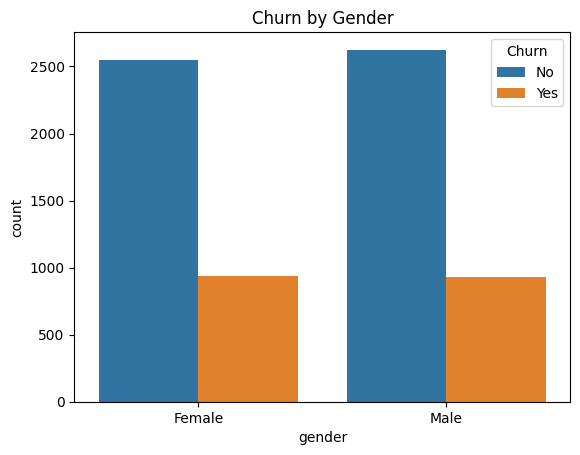

In [9]:

sns.countplot(data=df, x='gender', hue='Churn')
plt.title("Churn by Gender")
plt.show()


# **CHURN BY CONTRACT TYPE**

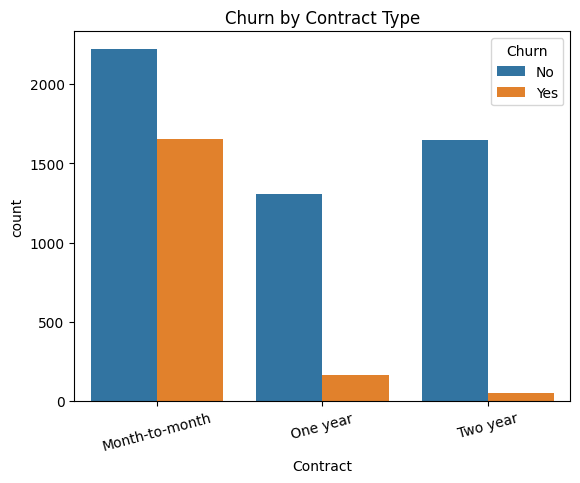

In [10]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()

# **MONTHLY CHARGES VS CHURN**

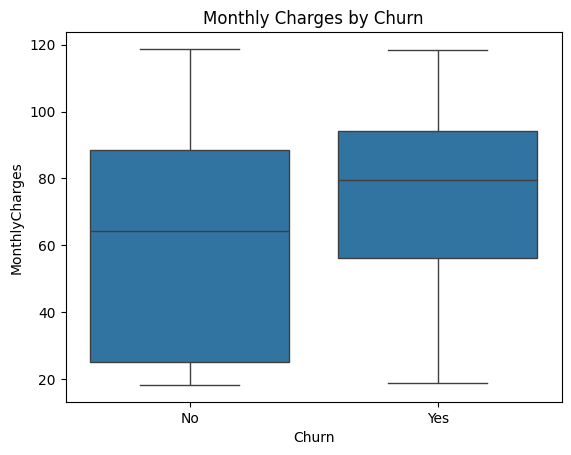

In [11]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn")
plt.show()

# **CHECK MISSING VALUES**

In [12]:

missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)


Series([], dtype: int64)


# Outliers

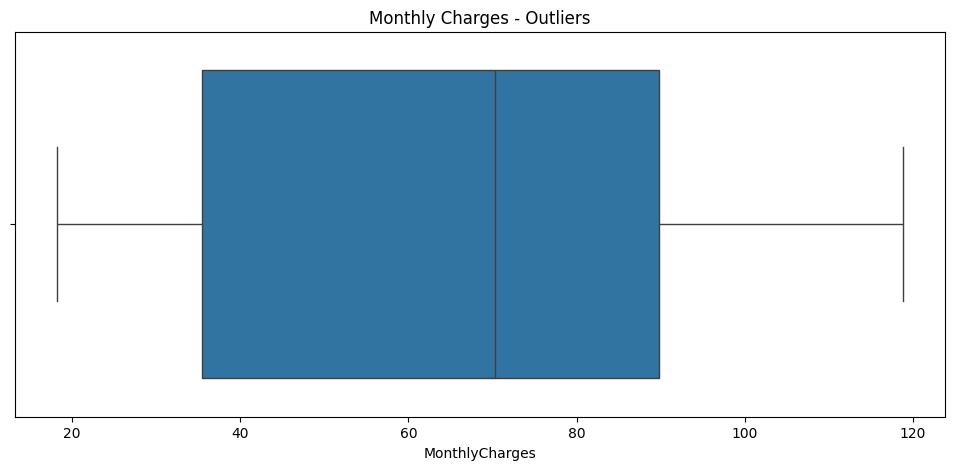

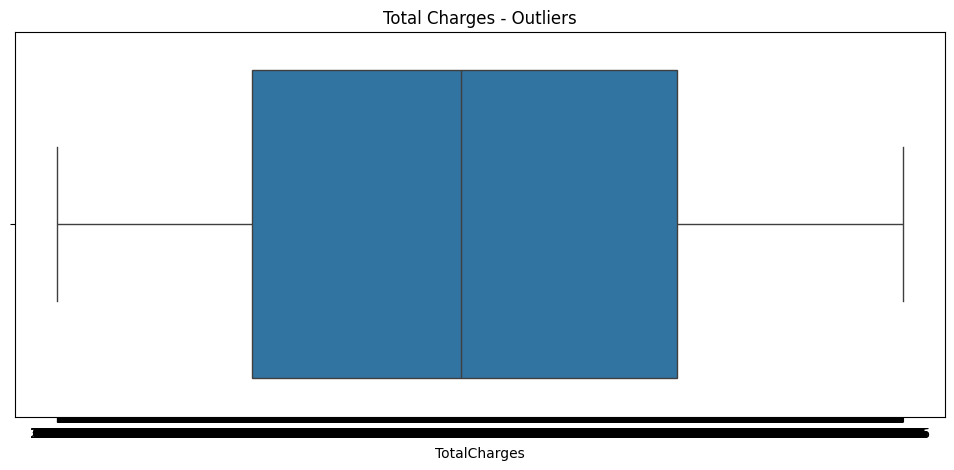

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['MonthlyCharges'])
plt.title("Monthly Charges - Outliers")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['TotalCharges'])
plt.title("Total Charges - Outliers")
plt.show()


# **FEATURE ENGINEERING**

In [14]:

df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                            labels=['0-12','13-24','25-48','49-60','61-72'])


In [15]:
df['MonthlyChargePerTenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)
df['IsSeniorCitizen'] = df['SeniorCitizen'].map({1: 1, 0: 0})


In [16]:
df.drop(['SeniorCitizen'], axis=1, inplace=True)

# ONE-HOT ENCODING

In [17]:

cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [18]:
print("🔎 CURRENT COLUMNS IN DATAFRAME")
print(df.columns.tolist())


🔎 CURRENT COLUMNS IN DATAFRAME
['tenure', 'MonthlyCharges', 'tenure_group', 'MonthlyChargePerTenure', 'IsSeniorCitizen', 'customerID_0003-MKNFE', 'customerID_0004-TLHLJ', 'customerID_0011-IGKFF', 'customerID_0013-EXCHZ', 'customerID_0013-MHZWF', 'customerID_0013-SMEOE', 'customerID_0014-BMAQU', 'customerID_0015-UOCOJ', 'customerID_0016-QLJIS', 'customerID_0017-DINOC', 'customerID_0017-IUDMW', 'customerID_0018-NYROU', 'customerID_0019-EFAEP', 'customerID_0019-GFNTW', 'customerID_0020-INWCK', 'customerID_0020-JDNXP', 'customerID_0021-IKXGC', 'customerID_0022-TCJCI', 'customerID_0023-HGHWL', 'customerID_0023-UYUPN', 'customerID_0023-XUOPT', 'customerID_0027-KWYKW', 'customerID_0030-FNXPP', 'customerID_0031-PVLZI', 'customerID_0032-PGELS', 'customerID_0036-IHMOT', 'customerID_0040-HALCW', 'customerID_0042-JVWOJ', 'customerID_0042-RLHYP', 'customerID_0048-LUMLS', 'customerID_0048-PIHNL', 'customerID_0052-DCKON', 'customerID_0052-YNYOT', 'customerID_0056-EPFBG', 'customerID_0057-QBUQH', 'cus

In [19]:
if 'tenure_group' in df.columns:
    df.drop('tenure_group', axis=1, inplace=True)

df = pd.get_dummies(df, drop_first=True)


# SPLIT FEATURES AND TARGET

In [20]:
if 'Churn_Yes' in df.columns:
    df['Churn'] = df['Churn_Yes']
    df.drop('Churn_Yes', axis=1, inplace=True)


In [21]:

X = df.drop('Churn', axis=1)
y = df['Churn']


In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RANDOM FOREST MODEL

In [24]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print(" RANDOM FOREST CLASSIFICATION REPORT")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))

 RANDOM FOREST CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1036
        True       0.70      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[965  71]
 [208 165]]
ROC AUC: 0.8502140114070409


# **Logistic Regression Model**

In [26]:

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]


In [27]:

print("LOGISTIC REGRESSION CLASSIFICATION REPORT")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_proba))

LOGISTIC REGRESSION CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.78      0.98      0.87      1036
        True       0.82      0.24      0.37       373

    accuracy                           0.78      1409
   macro avg       0.80      0.61      0.62      1409
weighted avg       0.79      0.78      0.74      1409

Confusion Matrix:
 [[1017   19]
 [ 285   88]]
ROC AUC: 0.8437108594615297


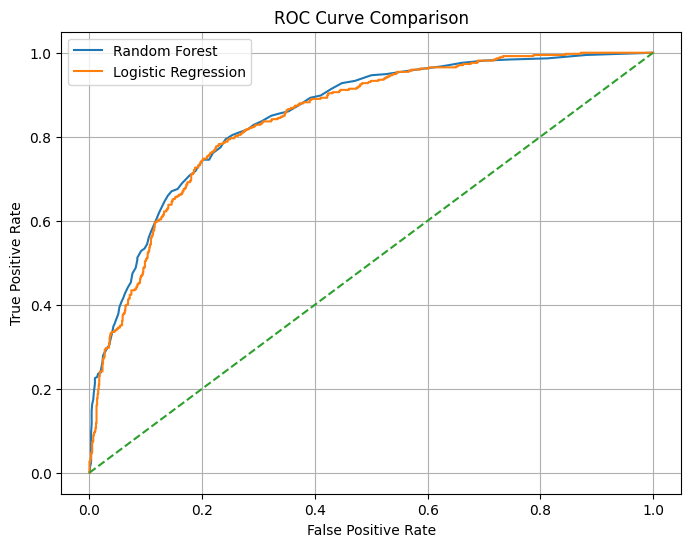

In [28]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot(lr_fpr, lr_tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.metrics import accuracy_score

print("ACCURACY SCORES")
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


ACCURACY SCORES
Random Forest Accuracy: 0.8019872249822569
Logistic Regression Accuracy: 0.7842441447835344


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

print("K-NEAREST NEIGHBORS")
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_proba = knn.predict_proba(X_test_scaled)[:, 1]

print("XGBOOST CLASSIFIER")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
xgb_proba = xgb.predict_proba(X_test_scaled)[:, 1]


K-NEAREST NEIGHBORS
XGBOOST CLASSIFIER


In [31]:
from sklearn.metrics import accuracy_score

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


KNN Accuracy: 0.7338537970191625
XGBoost Accuracy: 0.7849538679914834


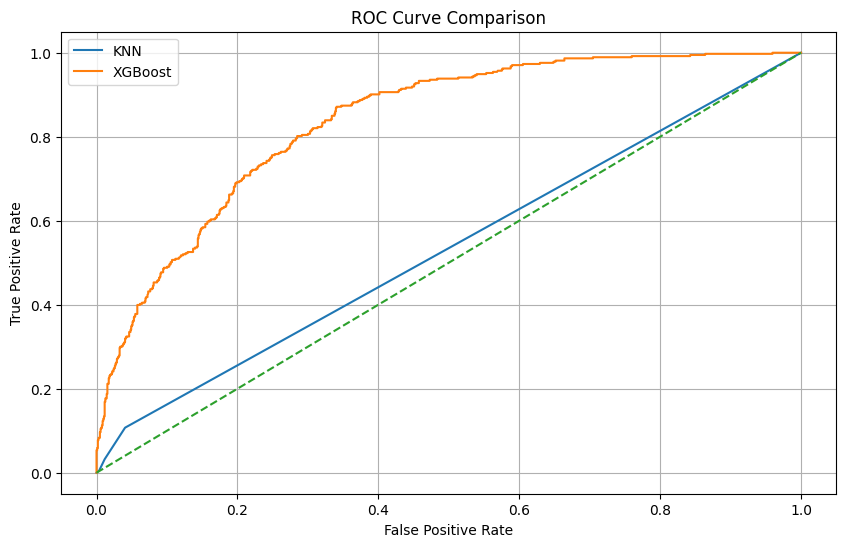

In [32]:
from sklearn.metrics import roc_curve

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_proba)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_proba)

plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'KNN', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, xgb_pred)
    ],
    'Precision': [
        precision_score(y_test, rf_pred),
        precision_score(y_test, lr_pred),
        precision_score(y_test, knn_pred),
        precision_score(y_test, xgb_pred)
    ],
    'Recall': [
        recall_score(y_test, rf_pred),
        recall_score(y_test, lr_pred),
        recall_score(y_test, knn_pred),
        recall_score(y_test, xgb_pred)
    ],
    'F1 Score': [
        f1_score(y_test, rf_pred),
        f1_score(y_test, lr_pred),
        f1_score(y_test, knn_pred),
        f1_score(y_test, xgb_pred)
    ]
}

metrics_df = pd.DataFrame(metrics_data)


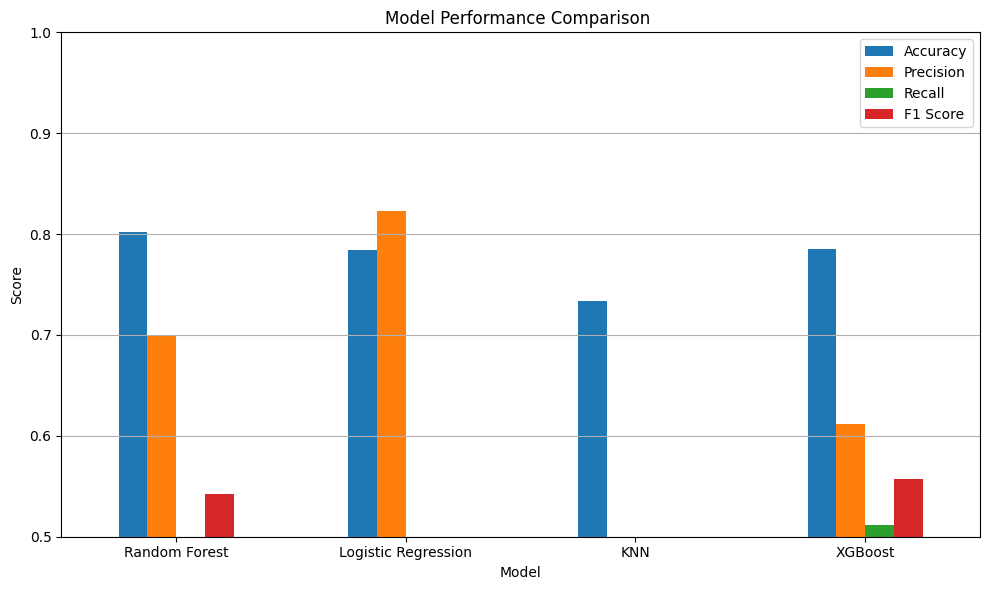

In [34]:
metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar',
    figsize=(10, 6),
    ylim=(0.5, 1.0),
    title="Model Performance Comparison "
)
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
